03 - Tratamento dos dados da base TESS.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from functions import *

Tratamento das colunas

In [2]:
tess = pd.read_csv('./data/tess/tess.csv')

tess_columns = [
    'tfopwg_disp',
    'ra',
    'dec',
    'st_teff',
    'st_rad',
    'pl_rade',
    'pl_eqt',
    'st_dist',
    'st_logg',
    'pl_orbper',
    'pl_trandep',
    'pl_insol'
]

tess_data = tess[tess_columns].copy()

tess_columns_name = {
    'tfopwg_disp': 'classification',
    'ra' : 'longitude',
    'dec' : 'latitude',
    'st_teff' : 'stellar_temperature',
    'st_rad' : 'stellar_radius',
    'pl_rade' : 'planet_radius',
    'pl_eqt' : 'eq_temperature',
    'st_dist' : 'distance',
    'st_logg' : 'stellar_sur_gravity',
    'pl_orbper' : 'orbital_period',
    'pl_trandep' : 'depth',
    'pl_insol' : 'insol_flux'
}

tess_data.rename(columns=tess_columns_name, inplace=True)


tess_data.head(5)

,classification,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,depth,insol_flux
0,FP,112.357708,-12.695960,10249.0,2.16986,5.818163,3127.204052,485.735,4.19,2.171348,656.886099,22601.948581
1,PC,122.580465,-5.513852,7070.0,2.01000,11.215400,4045.000000,295.862,4.03,1.931646,1286.000000,44464.500000
2,FP,104.726966,-10.580455,8924.0,5.73000,23.752900,2037.000000,943.109,NaN,1.867557,1500.000000,2860.610000
3,FP,110.559945,-25.207017,5388.5,NaN,NaN,1631.000000,7728.170,4.15,2.743230,383.410000,1177.360000
4,FP,122.178195,-48.802811,9219.0,2.15000,11.311300,4260.000000,356.437,4.14,3.573014,755.000000,54679.300000


In [3]:
tess_data['mission'] = 'tess'

Visualizar

In [4]:
tess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   classification       7025 non-null   object 
 1   longitude            7027 non-null   float64
 2   latitude             7027 non-null   float64
 3   stellar_temperature  6897 non-null   float64
 4   stellar_radius       6559 non-null   float64
 5   planet_radius        6559 non-null   float64
 6   eq_temperature       6748 non-null   float64
 7   distance             6823 non-null   float64
 8   stellar_sur_gravity  6235 non-null   float64
 9   orbital_period       6927 non-null   float64
 10  depth                7027 non-null   float64
 11  insol_flux           6871 non-null   float64
 12  mission              7027 non-null   object 
dtypes: float64(11), object(2)
memory usage: 713.8+ KB


Tratamento de INFINITOS no DISTANCE

In [5]:
tess_data['distance'] = np.where(tess_data['distance']==np.inf,np.nan,tess_data['distance'])

Tratamento de NULOS

In [6]:
colunas_dados_faltantes = ['stellar_temperature','stellar_radius','planet_radius','eq_temperature','distance','stellar_sur_gravity','orbital_period','insol_flux','depth']

Visualizar normalização dos dados

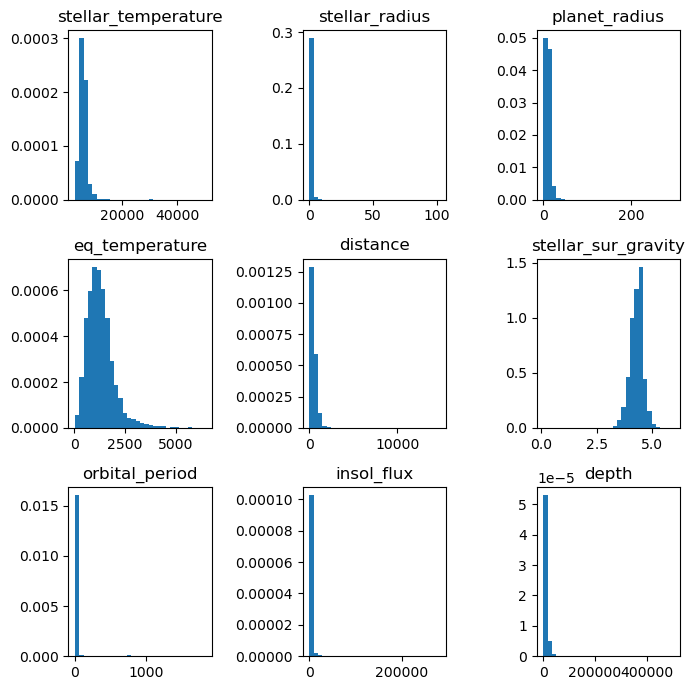

In [7]:
fig,ax = plt.subplots(3,3,figsize = (7,7),dpi = 100)

ax[0,0].hist(tess_data.stellar_temperature,bins = 30,density = True)
ax[0,0].set_title('stellar_temperature')

ax[0,1].hist(tess_data.stellar_radius,bins = 30,density = True)
ax[0,1].set_title('stellar_radius')

ax[0,2].hist(tess_data.planet_radius,bins = 30,density = True)
ax[0,2].set_title('planet_radius')

ax[1,0].hist(tess_data.eq_temperature,bins = 30,density = True)
ax[1,0].set_title('eq_temperature')

ax[1,1].hist(tess_data[tess_data.distance!=np.inf].distance,bins = 30,density = True) ## adicionei um filtro nesse plot, pois há dados de distance iguais a infinito
ax[1,1].set_title('distance')

ax[1,2].hist(tess_data.stellar_sur_gravity,bins = 30,density = True)
ax[1,2].set_title('stellar_sur_gravity')

ax[2,0].hist(tess_data.orbital_period,bins = 30,density = True)
ax[2,0].set_title('orbital_period')

ax[2,1].hist(tess_data.insol_flux,bins = 30,density = True)
ax[2,1].set_title('insol_flux')

ax[2,2].hist(tess_data.depth,bins = 30,density = True)
ax[2,2].set_title('depth')

plt.tight_layout()

In [8]:
dfx = tess_data.copy()
for coluna in colunas_dados_faltantes:
    dfx = imput_random(dfx,coluna)
tess_data = dfx.copy()

In [9]:
tess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   classification       7025 non-null   object 
 1   longitude            7027 non-null   float64
 2   latitude             7027 non-null   float64
 3   stellar_temperature  7027 non-null   float64
 4   stellar_radius       7027 non-null   float64
 5   planet_radius        7027 non-null   float64
 6   eq_temperature       7027 non-null   float64
 7   distance             7027 non-null   float64
 8   stellar_sur_gravity  7027 non-null   float64
 9   orbital_period       7027 non-null   float64
 10  depth                7027 non-null   float64
 11  insol_flux           7027 non-null   float64
 12  mission              7027 non-null   object 
dtypes: float64(11), object(2)
memory usage: 713.8+ KB


Tratamento das classificações dos planetas

In [10]:
tess_data['classification'].value_counts()

mapeamento = {('PC', 'KP'): 'planet', ('FP', 'FA'): 'not planet', ('CP', 'APC'): 'candidate'}

for chaves, valor in mapeamento.items():
    tess_data['classification'] = tess_data['classification'].replace(to_replace=chaves, value=valor)

# Verifique se a substituição foi feita corretamente
print(tess_data['classification'].value_counts())

classification
planet        5106
not planet    1089
candidate      830
Name: count, dtype: int64


Corrigir ordem das colunas

In [11]:
len(tess_data.columns)

13

In [12]:
tess_data.columns

Index(['classification', 'longitude', 'latitude', 'stellar_temperature',
       'stellar_radius', 'planet_radius', 'eq_temperature', 'distance',
       'stellar_sur_gravity', 'orbital_period', 'depth', 'insol_flux',
       'mission'],
      dtype='object')

In [13]:
colunas = ['classification', 'mission', 'longitude', 'latitude', 'stellar_temperature',
       'stellar_radius', 'planet_radius', 'eq_temperature', 'distance',
       'stellar_sur_gravity', 'orbital_period', 'insol_flux',
       'depth']

tess_data = tess_data.reindex(columns=colunas)

Escalonamento com MinMaxScaler() onde a 1a coluna mantida no lugar e as demais escalonadas dentro dos seus próprios limites cada

In [14]:
tess_data.head(5)

,classification,mission,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth
0,not planet,tess,112.357708,-12.695960,10249.0,2.169860,5.818163,3127.204052,485.735,4.190000,2.171348,22601.948581,656.886099
1,planet,tess,122.580465,-5.513852,7070.0,2.010000,11.215400,4045.000000,295.862,4.030000,1.931646,44464.500000,1286.000000
2,not planet,tess,104.726966,-10.580455,8924.0,5.730000,23.752900,2037.000000,943.109,4.332271,1.867557,2860.610000,1500.000000
3,not planet,tess,110.559945,-25.207017,5388.5,1.595695,13.718178,1631.000000,7728.170,4.150000,2.743230,1177.360000,383.410000
4,not planet,tess,122.178195,-48.802811,9219.0,2.150000,11.311300,4260.000000,356.437,4.140000,3.573014,54679.300000,755.000000


In [15]:
scaler = MinMaxScaler()

tess_scaled = tess_data.copy()

cols_to_scale = tess_scaled.columns[1:] ## isso define as colunas a escalonar, mas nao tira a coluna categorica mission
col_to_skip = 'mission'
cols_to_scale = cols_to_scale.drop(col_to_skip) ## isso retira a coluna mission da lista de colunas a serem escalonadas

tess_scaled[cols_to_scale] = scaler.fit_transform(tess_scaled[cols_to_scale].values) ## isso escalona as colunas a serem escalonadas

tess_scaled_data = pd.DataFrame(tess_scaled, columns=tess_scaled.columns)
tess_scaled_data.head(5)

,classification,mission,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth
0,not planet,tess,0.312001,0.429974,0.157675,0.020164,0.017756,0.484662,0.032551,0.697875,0.001107,0.080482,0.001254
1,planet,tess,0.340409,0.470197,0.090312,0.018596,0.035955,0.628607,0.019653,0.670574,0.000975,0.158331,0.002502
2,not planet,tess,0.290796,0.441822,0.129598,0.055097,0.078232,0.313676,0.063619,0.722150,0.000940,0.010186,0.002927
3,not planet,tess,0.307005,0.359907,0.054681,0.014530,0.044395,0.250000,0.524505,0.691050,0.001420,0.004192,0.000711
4,not planet,tess,0.339292,0.227761,0.135849,0.019969,0.036279,0.662327,0.023768,0.689343,0.001875,0.194704,0.001449


In [16]:
tess_scaled_data.to_pickle('data\\tess\\tess_data_treated.pkl')